In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #(xxxx is your specific GPU ID)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns

In [3]:
performance_command = pd.read_csv("performance_command_0531_5->30_final_free&unfree.csv")
performance_speaker = pd.read_csv("performance_speaker_0531_5->30_final_free&unfree.csv")

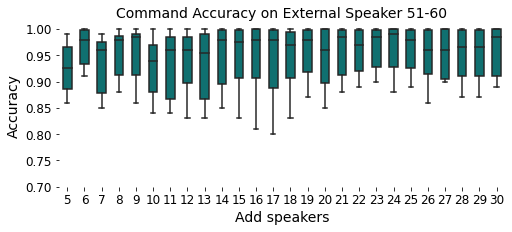

In [4]:

fig = plt.figure(figsize=(8,3))
sns.boxplot(data=performance_command.iloc[:,56:].transpose(),width=0.5,color="teal")
plt.xticks(range(len(performance_command)),performance_command.iloc[:,0],rotation = 'horizontal',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Accuracy",fontsize=14)
# plt.xlabel("Group Speaker Number",fontsize=14)
plt.xlabel("Add speakers",fontsize=14)
plt.title("Command Accuracy on External Speaker 51-60",fontsize=14)
plt.ylim([0.70,1.01])
plt.box(False)
plt.show()


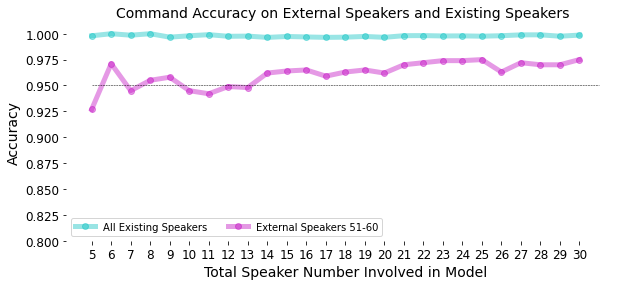

In [5]:
# performance_command.iloc[:,56:].plot(style='*-',figsize = ( 12 , 4))
plt.figure(figsize = ( 10 , 4))
plt.plot(performance_command.transpose()[performance_speaker.transpose().iloc[2:,:]>0].mean(),c='c',linewidth=5,alpha=0.4,marker ='o')
# plt.plot(performance_command.transpose()[performance_speaker.transpose().iloc[2:,:]==0].mean(),c='b',linewidth=5,alpha=0.4,marker ='o')
plt.plot(performance_command.transpose().iloc[52:,:].mean(),c='m',linewidth=5,alpha=0.4,marker ='o')
plt.plot([0.95]*27,"k--",linewidth=0.5)
plt.xlabel("Total Speaker Number Involved in Model",fontsize=14)
plt.title("Command Accuracy on External Speakers and Existing Speakers ",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Accuracy",fontsize=14)
plt.ylim([0.80,1.01])
plt.box(False)
plt.xticks(range(len(performance_command)),performance_command.iloc[:,0],rotation = 'horizontal',fontsize=12)
# plt.legend(list(performance_command.iloc[:,56:].columns) +["Average Existing Speakers"],ncol=4,title="External Speaker ID",loc=8,fontsize=10)
plt.legend(["All Existing Speakers","External Speakers 51-60"],ncol=3)
plt.show()

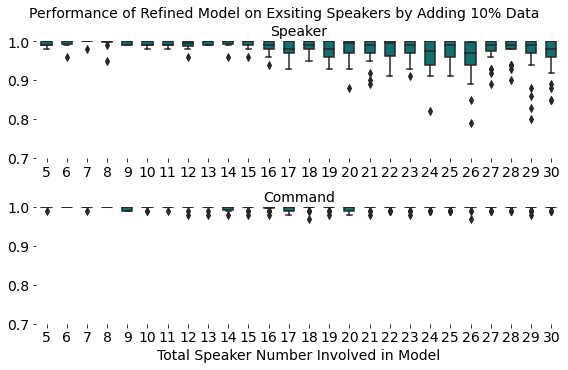

In [6]:
fig = plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
sns.boxplot(data=performance_speaker.transpose()[performance_speaker.transpose().iloc[2:,:]>0],width=0.5,color="teal")
plt.box(False)
plt.ylim([0.7,1.00])
plt.yticks(fontsize=14)
plt.xticks(range(len(performance_speaker)),performance_speaker["Subject_No"],fontsize=14)
plt.title("Speaker",fontsize=14)
plt.ylabel(None)
plt.subplot(2,1,2)
sns.boxplot(data=performance_command.transpose()[performance_speaker.transpose().iloc[2:,:]>0],width=0.5,color="teal")
plt.box(False)
plt.ylim([0.7,1.00])
plt.yticks(fontsize=14)
plt.xticks(range(len(performance_speaker)),performance_speaker["Subject_No"],fontsize=14)
plt.ylabel(None)
plt.title("Command",fontsize=14)
plt.xlabel("Total Speaker Number Involved in Model",fontsize=14)
# fig.text(0.5, -0.05, 'Accuracy', ha='center', va='center', rotation='horizontal',fontsize=14)
fig.text(0.5, 1.0, 'Performance of Refined Model on Exsiting Speakers by Adding 10% Data', ha='center', va='center', rotation='horizontal',fontsize=14)
plt.tight_layout()
plt.show()

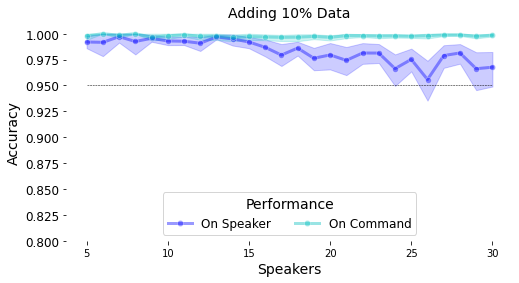

In [7]:
S_data_10 = pd.DataFrame(columns=["Speakers","Performance"])
for s in performance_speaker["Subject_No"].values:
    da_temp = pd.DataFrame(columns=["Speakers","Performance"])
    da_temp ["Performance"] = performance_speaker.iloc[s-5,2:2+s]
    da_temp ["Speakers"] = s
    S_data_10 = S_data_10.append(da_temp)
S_data_10 = S_data_10.reset_index(drop=True)   

C_data_10 = pd.DataFrame(columns=["Speakers","Performance"])
for s in performance_command["Subject_No"].values:
    da_temp = pd.DataFrame(columns=["Speakers","Performance"])
    da_temp ["Performance"] = performance_command.iloc[s-5,2:2+s]
    da_temp ["Speakers"] = s
    C_data_10 = C_data_10.append(da_temp)
C_data_10 = C_data_10.reset_index(drop=True)   

fig=plt.figure(figsize = ( 8 , 4))

sns.lineplot(data=S_data_10, x="Speakers", y="Performance",color='b',linewidth=3,alpha=0.4,marker ='o')
sns.lineplot(data=C_data_10, x="Speakers", y="Performance",color='c',linewidth=3,alpha=0.4,marker ='o')
plt.plot(range(5,len(performance_command)+5),[0.95]*26,"k--",linewidth=0.5)
plt.xlabel("Speakers",fontsize=14)
plt.title("Adding 10% Data",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Accuracy",fontsize=14)
plt.ylim([0.80,1.01])
plt.box(False)
# plt.xticks(range(5,len(performance_command)+5),performance_command.iloc[:,0],rotation = 'horizontal',fontsize=12)
# plt.legend(list(performance_command.iloc[:,56:].columns) +["Average Existing Speakers"],ncol=4,title="External Speaker ID",loc=8,fontsize=10)
plt.legend(["On Speaker","On Command"],title="Performance",ncol=3,loc=8,fontsize=12,title_fontsize=14)
# plt.show()


plt.show()

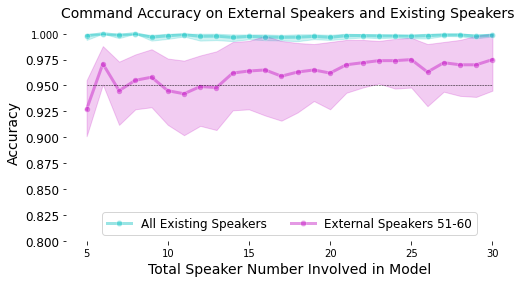

In [8]:

C_data_exist = pd.DataFrame(columns=["Speakers","Performance"])
for s in performance_command["Subject_No"].values:
    da_temp = pd.DataFrame(columns=["Speakers","Performance"])
    da_temp ["Performance"] = performance_command.iloc[s-5,2:2+s]
    da_temp ["Speakers"] = s
    C_data_exist = C_data_exist.append(da_temp)
C_data_exist = C_data_exist.reset_index(drop=True)   

C_data_external = pd.DataFrame(columns=["Speakers","Performance"])
for s in performance_command["Subject_No"].values:
    da_temp = pd.DataFrame(columns=["Speakers","Performance"])
    da_temp ["Performance"] = performance_command.iloc[s-5,-10:]
    da_temp ["Speakers"] = s
    C_data_external = C_data_external.append(da_temp)
C_data_external = C_data_external.reset_index(drop=True)   


fig=plt.figure(figsize = ( 8 , 4))

sns.lineplot(data=C_data_exist, x="Speakers", y="Performance",color='c',linewidth=3,alpha=0.4,marker ='o')
sns.lineplot(data=C_data_external, x="Speakers", y="Performance",color='m',linewidth=3,alpha=0.4,marker ='o')
plt.plot(range(5,len(performance_command)+5),[0.95]*26,"k--",linewidth=0.5)
plt.xlabel("Total Speaker Number Involved in Model",fontsize=14)
plt.title("Command Accuracy on External Speakers and Existing Speakers ",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Accuracy",fontsize=14)
plt.ylim([0.80,1.01])
plt.box(False)
plt.legend(["All Existing Speakers","External Speakers 51-60"],ncol=3,loc=8,fontsize=12,title_fontsize=14)


plt.show()

In [9]:
performance_command_40par = pd.read_csv("performance_command_0613_5->30_final_free&unfree_40par.csv")
performance_speaker_40par = pd.read_csv("performance_speaker_0613_5->30_final_free&unfree_40par.csv")

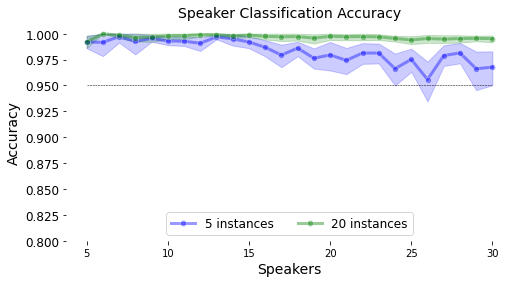

In [14]:
S_data_10 = pd.DataFrame(columns=["Speakers","Performance"])
for s in performance_speaker["Subject_No"].values:
    da_temp = pd.DataFrame(columns=["Speakers","Performance"])
    da_temp ["Performance"] = performance_speaker.iloc[s-5,2:2+s]
    da_temp ["Speakers"] = s
    S_data_10 = S_data_10.append(da_temp)
S_data_10 = S_data_10.reset_index(drop=True)   

S_data_40 = pd.DataFrame(columns=["Speakers","Performance"])
for s in performance_speaker_40par["Subject_No"].values:
    da_temp = pd.DataFrame(columns=["Speakers","Performance"])
    da_temp ["Performance"] = performance_speaker_40par.iloc[s-5,2:2+s]
    da_temp ["Speakers"] = s
    S_data_40 = S_data_40.append(da_temp)
S_data_40 = S_data_40.reset_index(drop=True)   

fig=plt.figure(figsize = ( 8 , 4))

sns.lineplot(data=S_data_10, x="Speakers", y="Performance",color='b',linewidth=3,alpha=0.4,marker ='o')
sns.lineplot(data=S_data_40, x="Speakers", y="Performance",color='g',linewidth=3,alpha=0.4,marker ='o')
plt.plot(range(5,len(performance_command)+5),[0.95]*26,"k--",linewidth=0.5)
plt.xlabel("Speakers",fontsize=14)
plt.title("Speaker Classification Accuracy",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Accuracy",fontsize=14)
plt.ylim([0.80,1.01])
plt.box(False)
# plt.xticks(range(5,len(performance_command)+5),performance_command.iloc[:,0],rotation = 'horizontal',fontsize=12)
# plt.legend(list(performance_command.iloc[:,56:].columns) +["Average Existing Speakers"],ncol=4,title="External Speaker ID",loc=8,fontsize=10)
plt.legend(["5 instances","20 instances"],ncol=3,loc=8,fontsize=12)
# plt.show()


plt.show()